#importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
%matplotlib inline
pd.options.display.max_rows = 100

clean_data = pd.read_csv('../../data/Data_Marketing_Customer_Analysis_Round3.csv')

In [2]:
df = pd.DataFrame(clean_data)



#Show a plot of the total number of responses.

<AxesSubplot:>

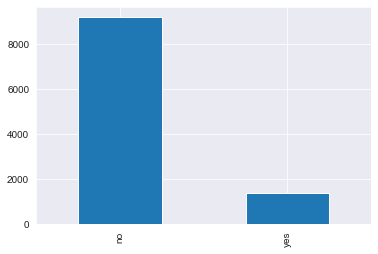

In [3]:
df['response'].value_counts().plot(kind='bar')

#Show a plot of the response by the sales channel.

<AxesSubplot:xlabel='sales_channel'>

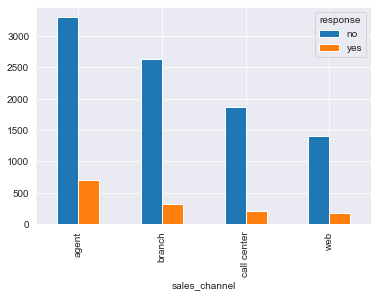

In [4]:
df.groupby(['sales_channel'])['response'].value_counts().unstack().plot.bar()

# plt.figure(figsize=(20,15))
# plt.subplot(2,2,1)
# plt.title('response by the sales channel', size='25', fontweight='bold')
# #hue = class_survival['alive'],
# sns.barplot(x = df['response'],y = df['sales_channel'],  palette=palette_alive)
# response_by_the_sales.plot(kind='bar')
# y= df['response']
# x=  df['sales_channel']
# df['response'].value_counts().plot(kind='swarm')
# fig=plt.figure(figsize=(10,8))
# plt.plot(x,y,label="response by the sales channel")
# # plt.plot(x,y2,label="y2=4*x")
# plt.legend(loc="lower right",fontsize=18)
# plt.title("this is my very first plot ever")
# plt.xlabel("sales_channel")
# plt.ylabel("response")

#Show a plot of the response by the total claim amount.

<AxesSubplot:ylabel='Frequency'>

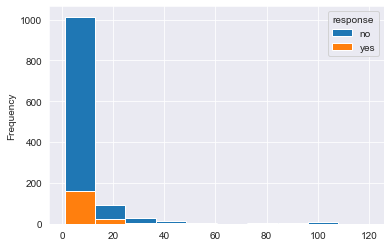

In [5]:

df.groupby(['total_claim_amount'])['response'].value_counts().unstack().plot.hist()


#Show a plot of the response by income.

<AxesSubplot:>

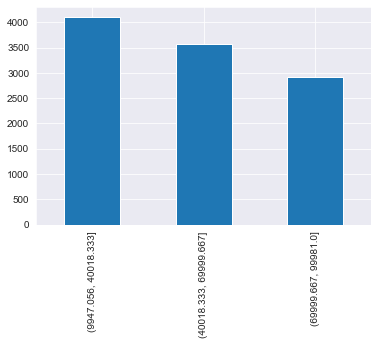

In [6]:
# response_by_claim = df.groupby(['response'])['total_claim_amount'].count()
# response_by_claim.plot(kind='errorbar')
# sns.set_theme(style="ticks", color_codes=True)
# income_response_group.unstack().plot()
# income_response_group
    #.plot.hist()

# out = pd.cut(income_response_group, bins=range(1,6), include_lowest=True)
# ax = out.value_counts(sort=False).plot.bar(rot=0, color="0", figsize=(9,5))
# plt.show()

income_response_group = df.groupby(['income'])['response'].value_counts()
cut = pd.cut(df['income'], bins=3).value_counts()
cut.plot.bar()





<AxesSubplot:ylabel='income'>

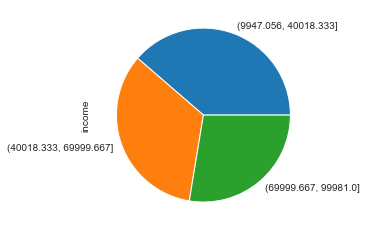

In [7]:
cut.plot.pie()

In [8]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,arizona,4809,no,basic,college,2/18/11,employed,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,california,2228,no,basic,college,1/18/11,unemployed,f,61311,suburban,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,washington,14947,no,basic,bachelor,2/10/11,employed,m,22139,suburban,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,oregon,22332,yes,extended,college,1/11/11,employed,m,49078,suburban,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,oregon,9025,no,premium,bachelor,1/17/11,medical leave,f,23675,suburban,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,nevada,15563,no,premium,bachelor,1/19/11,unemployed,f,38966,suburban,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10598,oregon,5259,no,basic,college,1/6/11,employed,f,61146,urban,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10599,arizona,23893,no,extended,bachelor,2/6/11,employed,f,39837,rural,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10600,california,11971,no,premium,college,2/13/11,employed,f,64195,urban,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize
